# Import all the packages. 

In [1]:
import DifferentialEquations
import DynamicalSystems
import Statistics
import Plots

In [2]:
using DynamicalSystems
using DifferentialEquations
using Statistics
using Plots

# The function of two coupled lasers with delay.

$$\begin{align} 
   \frac{dE_{1}(t)}{dt} = (1+ia)N_{1}(t)E_{1}(t) + ke^{-iC_{p}} E_{2}(t-\tau) - i\Delta E_{1}(t)\\
   \frac{dE_{2}(t)}{dt} = (1+ia)N_{2}(t)E_{2}(t) + ke^{-iC_{p}} E_{1}(t-\tau) + i\Delta E_{2}(t)\\
   T \frac{dN_{1}(t)}{dt} = P_{1} - N_{1}(t) - (1+2N_{1}(t)) \lvert {E_{1}(t)} \rvert^{2}\\
   T \frac{dN_{2}(t)}{dt} = P_{2} - N_{2}(t) - (1+2N_{2}(t)) \lvert {E_{2}(t)} \rvert^{2}
  \end{align}$$

In [4]:
function dimer_delay(du,u,h,p,t)
  a,k,Cp,delta,T,p1,p2,tau = p
  hist1 = h(p, t-tau)[1]
  hist2 = h(p, t-tau)[2]

  du[1] = (1.0 + a*1im).*u[1].*u[3] + k.*exp(-1im*Cp).*hist2 - 1im*delta.*u[1]
  du[2] = (1.0 + a*1im).*u[2].*u[4] + k.*exp(-1im*Cp).*hist1 + 1im*delta.*u[2]
  du[3] = (1.0/T).*( p1 - u[3] - (1.0 .+ 2.0 .* u[3]) .* abs2.(u[1]) )
  du[4] = (1.0/T).*( p2 - u[4] - (1.0 .+ 2.0 .* u[4]) .* abs2.(u[2]) )

end

dimer_delay (generic function with 1 method)

# Parameters.

In [5]:
# Parameters.
nec, a, k, T, p1, p2 = 2, 2.5, 0.1, 392, 0.23, 0.23
tau, Cp, delta = 20.0, 2.0, 0.0

(20.0, 2.0, 0.0)

In [6]:
# The range of time.
tspan = (0.0,50000.0)
h(p, t) = ones(4)

h (generic function with 1 method)

In [7]:
# The method and initial conditions.
alg = MethodOfSteps(Tsit5())
x0, y0 = 0.01.*rand(nec)+0.01.*1im*rand(nec), 0.001.*rand(nec)
u0 = [x0;y0]

4-element Array{Complex{Float64},1}:
   0.007358633732042408 + 0.0012749305233361265im
  0.0005183336120580728 + 0.00549628945747412im
   0.000491689804438503 + 0.0im
 0.00020338126576052628 + 0.0im

# Solving numerically the above system. We save at t step = 0.5.

In [9]:
p = (a,k,Cp,delta,T,p1,p2,tau)
lags = [tau]
prob = DDEProblem(dimer_delay,u0,h,tspan,p; constant_lags=lags)
sol = solve(prob,alg,saveat=0.5)
size(sol)

(4, 100001)

In [10]:
# The final point.
E_1 = abs.(sol[1,end])
E_2 = abs.(sol[2,end])
Phi_1 = angle(sol[1,end])
Phi_2 = angle(sol[2,end])
println(E_1," ",E_2," ",Phi_2 - Phi_1)

0.6423488172867527 0.6423488172867501 -3.1415926535898


# Plots

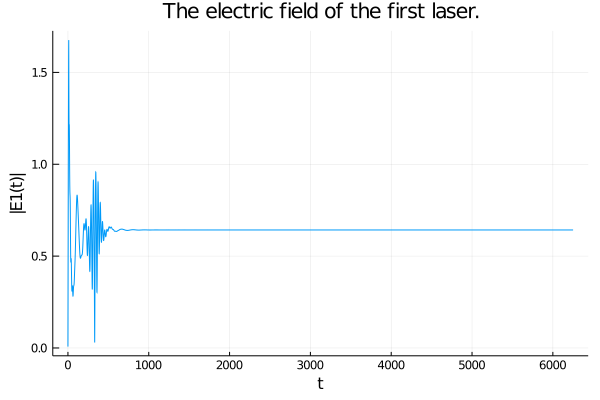

In [17]:
plot((sol.t[1:25000]./2),abs.(sol[1,1:25000]), title = "The electric field of the first laser.",
    legend=:none, xlabel="t", ylabel="|E1(t)|")

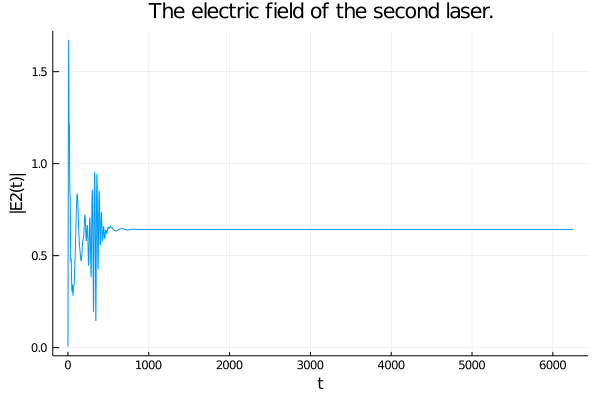

In [19]:
plot((sol.t[1:25000]./2),abs.(sol[2,1:25000]),title = "The electric field of the second laser.",
    legend=:none, xlabel="t", ylabel="|E2(t)|")

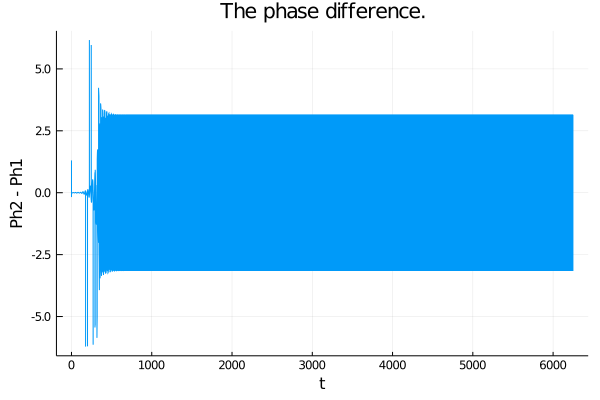

In [21]:
plot((sol.t[1:25000]./2),angle.(sol[2,1:25000]) - angle.(sol[1,1:25000]), title = "The phase difference.",
    legend=:none, xlabel="t", ylabel="Ph2 - Ph1")

If you have any questions, please feel free to sent me an email on jonialdshena@gmail.com.  
If I have helped you in research that led to a publication, please be kind enough to cite it, using my Git-Hub acount.